In [101]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind, ttest_1samp, levene, shapiro, iqr, mannwhitneyu
from statsmodels.stats.power import ttest_power 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [52]:
testData = pd.read_excel("SM4-Golf.xls")

# Exploratory data analysis:

In [53]:
testData.head(10)
# 2 unpaired samples - same test conducted on different population

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262
5,283,251
6,258,262
7,266,289
8,259,286
9,270,264


In [54]:
testData.describe()
# Number of observations - 40
# Number of samples - 2, having maximum same and minimum slightly different

,Current,New
count,40.000000,40.000000
mean,270.275000,267.500000
std,8.752985,9.896904
min,255.000000,250.000000
25%,263.000000,262.000000
50%,270.000000,265.000000
75%,275.250000,274.500000
max,289.000000,289.000000


In [55]:
testData.info()
# 40 non-null values in both the columns
# Current and New - continuous variables and assuming that they are normally distributed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
Current    40 non-null int64
New        40 non-null int64
dtypes: int64(2)
memory usage: 720.0 bytes


In [56]:
current = testData["Current"]
new = testData["New"]

In [57]:
# Measure of central tendency - mean, median and mode. 
# Mean calculated in the describe dataset
current.median(), new.median()

(270.0, 265.0)

In [58]:
current.mode()

0    263
1    272
2    275
dtype: int64

In [59]:
new.mode()
# Inference 1: Mode analysis - the current ball travels larger distance(in yards) than the new ball - with better cut resistance

0    262
1    263
dtype: int64

In [60]:
## Inference 2: Looking at the measure of central tendency the samples looks different as the measurement differs

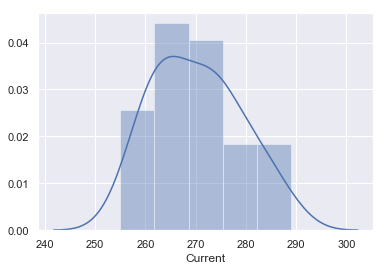

In [62]:
# Analyse the spread of data
sns.distplot(testData["Current"])

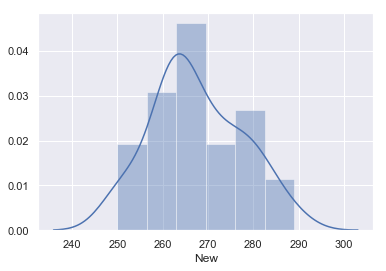

In [63]:
sns.distplot(testData["New"])

In [64]:
# Inference 3: The distance travelled by the new balls looks better spread than distance travelled by the current balls

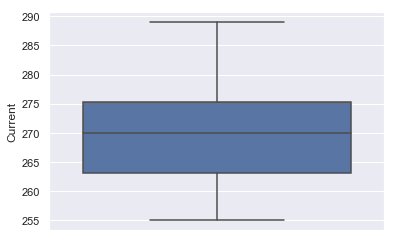

In [65]:
# Analyse the spread of data using IRQ
sns.boxplot(testData["Current"], orient='v')

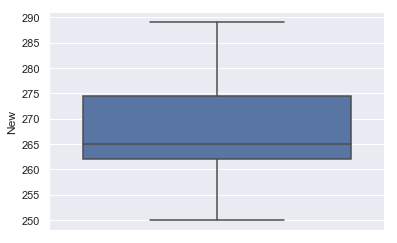

In [66]:
sns.boxplot(testData["New"], orient='v')

In [67]:
# Calculate Inter quartile range - measurement of dispersion
iqr(current), iqr(new)

(12.25, 12.5)

In [68]:
# Inference 4: IQR of new is greater than current - the distance travelled by the new balls is spread better than current balls

In [71]:
# Homogeneity of variance: Compare the variance across two groups - current and new
# H0 -> variance between current and new is same
# Ha -> variance between current and new is different 
# Level of signifinace - 5% or Confidence level - 95%

In [70]:
levene(current,new)

LeveneResult(statistic=0.2553238291765741, pvalue=0.6147759523331309)

In [72]:
#Inference 5: pvalue > 0.05. Hence accept Null Hypothesis - variance between the distance travelled by the current balls and new balls are same

In [73]:
# Test the distribution of univariate variable: Shapiro-Wilk test
# H0 -> Distrance travelled by current/ new balls is normally distributes
# Ha -> Distrance travelled by current/ new balls deviates from normally distribution 

In [74]:
shapiro(current)

(0.9707046747207642, 0.378787100315094)

In [75]:
shapiro(new)

(0.9678263664245605, 0.3064655363559723)

In [76]:
# both the pvalue of current balls distance and new balls distance > 0.05. 
# Inference 6: Hence accept Null Hypothesis - distance of current and new balls are normally distributed

In [77]:
# Calculate pooled standard deviation - This is for 2 sample test

In [78]:
np.sqrt(((40-1)*np.var(current) + (40-1)*np.var(new))/40+40-2)

14.28091000689382

In [79]:
# Calculate sample power - difference in mean / SD spooled

In [80]:
(np.mean(current)-np.mean(new))/14.28

0.1943277310924354

In [86]:
# 2 sided T- test 
# H0 -> Mean of the driving distance between current and new golf ball is same
# Ha -> Mean of the driving distance between current and new golf ball is significantly different
print(ttest_power(0.19, nobs=40, alpha=0.05, alternative="two-sided"))

0.21628588242534494


In [87]:
#Inference 7: 21% chances to reject Null hypothesis and the null hypothesis being false (or) 79% of chances accepting the Null hypothesis.

In [91]:
# Compare mean of 2 independent or unpaired groups - same test conducted on different population

In [92]:
t_statistics, p_value = ttest_ind(current, new)

In [93]:
print(t_statistics, p_value)

1.3283615935245678 0.18793228491854663


In [95]:
# Inference 8: p_value (0.188) > 0.05. Hence accept Null hypothesis.   

In [96]:
# Recommendation: Since there is no mean difference between current and new golf ball driving distance, 
# introduction of the new golf bar will not impact the Par's market share. 

In [97]:
# Wilcoxon and ttest_1samp are for paired testing and cannot be used for this sample. 

In [98]:
# Mann-Whitney test is for unpaired non-parametric testing. As the samples are uniformly distributed, we cannot apply this test. 
# However, assuming that the samples are not uniformly distributed apllying Mann-whitney test

In [99]:
# H0 -> Equally likely that a randomly selected value from one sample will be less than or greater than selected 
# value from the other sample
# Ha -> distribution are not equal

In [102]:
u, p_value = mannwhitneyu(current, new)

In [103]:
print(u, p_value)

668.0 0.10265192122893124


In [ ]:
# p_value > 0.05. Null hypothesis rejected.